In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import numpy as np

### Functions

In [2]:
def permuteRows(X, l):
    Nsamples = X.shape[0]
    randidx = np.random.permutation(Nsamples)
    
    Xp = X[randidx,:]
    lp = l[randidx]
    
    return Xp, lp

def divideTrainTest(Xp, lp):
    Nsamples = Xp.shape[0]
    train_samples = int(np.ceil(0.8*Nsamples))
    
    X_train = Xp[0:train_samples, :]
    X_test  = Xp[train_samples:, :]
    
    l_train = lp[0:train_samples]
    l_test  = lp[train_samples:]
    
    return X_train, X_test, l_train, l_test

def crossvalidation(clf, X, l, NRUNS):
    score = np.zeros((NRUNS,))
    for n in np.arange(NRUNS):
        Xp, lp = permuteRows(X, l)
        X_train, X_test, l_train, l_test= divideTrainTest(Xp, lp)    
        clf.fit(X_train, l_train)
        score[n] = clf.score(X_test, l_test)
    return score

## First exercise

### Load and preprocess data

In [3]:
# load data from file
data = np.genfromtxt('dermatology.data', delimiter=',')

print data.shape

# separate label from data
X = data[:,0:34] # data
l = data[:,34]   # labels

print X.shape, l.shape

# standardize data
Nfeatures = X.shape[1]
for n in np.arange(Nfeatures):
    X[:,n] = (X[:,n] - X[:,n].mean())/(X[:,n].std())

(358, 35)
(358, 34) (358,)


### Learning stage

In [4]:
from sklearn import lda
from sklearn import linear_model
from sklearn import svm

# Define classifiers        
clf_lda = lda.LDA()   
clf_perceptron = linear_model.Perceptron()
clf_svm = svm.SVC()

# Cross validation stage
NRUNS = 1000
lda_accuracy = crossvalidation(clf_lda, X, l, NRUNS)
perceptron_accuracy = crossvalidation(clf_perceptron, X, l, NRUNS)
svm_accuracy = crossvalidation(clf_svm, X, l, NRUNS)

# Print classifiers accuracy
methods_list = ['LDA', 'Perceptron', 'SVM']
accuracy_list = [lda_accuracy, perceptron_accuracy, svm_accuracy]
for method, accuracy in zip(methods_list, accuracy_list):
    print '{} mean accuracy {}'.format(method, accuracy.mean())
    print '{} accuracy std {}'.format(method, accuracy.std())
    print '{} min accuracy {}'.format(method, accuracy.min())
    print '{} max accuracy {}'.format(method, accuracy.max())
    print

LDA mean accuracy 0.965971830986
LDA accuracy std 0.0215126448886
LDA min accuracy 0.859154929577
LDA max accuracy 1.0

Perceptron mean accuracy 0.958929577465
Perceptron accuracy std 0.0224953167997
Perceptron min accuracy 0.87323943662
Perceptron max accuracy 1.0

SVM mean accuracy 0.973014084507
SVM accuracy std 0.0172898094957
SVM min accuracy 0.915492957746
SVM max accuracy 1.0



## Second exercise

### Load data

In [10]:
x_train = np.loadtxt('06_Assignment_data/data-input-learning.txt')
t_train = np.loadtxt('06_Assignment_data/data-output-learning.txt')
x_test = np.loadtxt('06_Assignment_data/data-input-testing.txt')
t_test = np.loadtxt('06_Assignment_data/data-output-testing.txt')

print x_train.shape, t_train.shape, x_test.shape, t_test.shape

(3000, 5) (3000,) (1000, 5) (1000,)


In [11]:
from sklearn import svm
from sklearn import gaussian_process
from sklearn import linear_model


clf_gpr = gaussian_process.GaussianProcess(nugget=2)
clf_blr = linear_model.BayesianRidge()
clf_svr = svm.SVR()



In [12]:
clf_svr.fit(x_train, t_train)
y_svr_test = clf_svr.predict(x_test)
print y_svr_test


[-1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.

-1.37660243427e-07
0.99401999652
0.999837233161


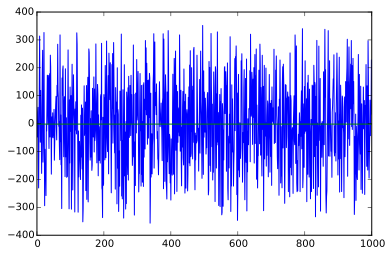

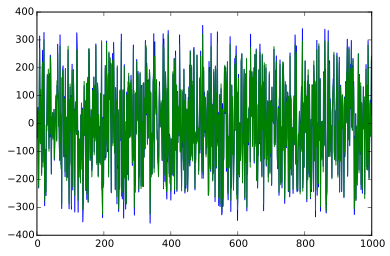

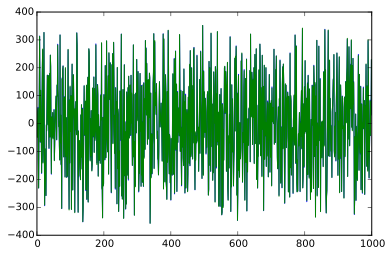

In [13]:
clf_svr.fit(x_train, t_train)
y_svr_test = clf_svr.predict(x_test)
print clf_svr.score(x_test, t_test)

clf_gpr.fit(x_train, t_train)
y_gpr_test = clf_gpr.predict(x_test)
print clf_gpr.score(x_test, t_test)

clf_blr.fit(x_train, t_train)
y_blr_test = clf_blr.predict(x_test)
print clf_blr.score(x_test, t_test)

plt.figure()
plt.plot(t_test)
plt.plot(y_svr_test)

plt.figure()
plt.plot(t_test)
plt.plot(y_gpr_test)

plt.figure()
plt.plot(t_test)
plt.plot(y_blr_test)